

Center_104_Rank9.csv


Random forest regressor: RMSE = 149.00631630306853, MAE = 87.97575685244982, R-squared = 0.708804162560733, Explained Variance = 0.7089383805918975, Max Error = 802.1907180053656


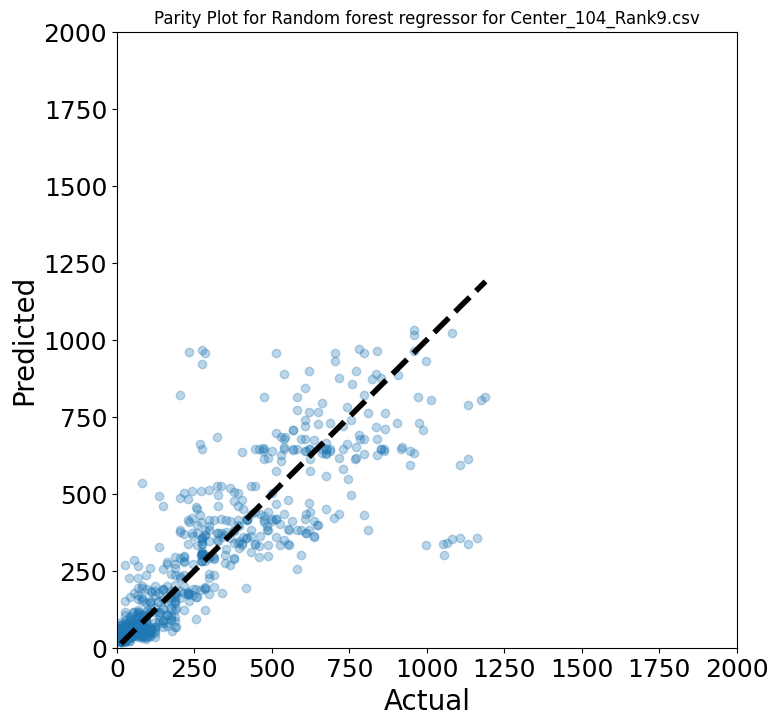



Center_10_Rank3.csv


Random forest regressor: RMSE = 172.78411634334464, MAE = 113.82846657929227, R-squared = 0.8821363444969268, Explained Variance = 0.882431947229324, Max Error = 1097.15


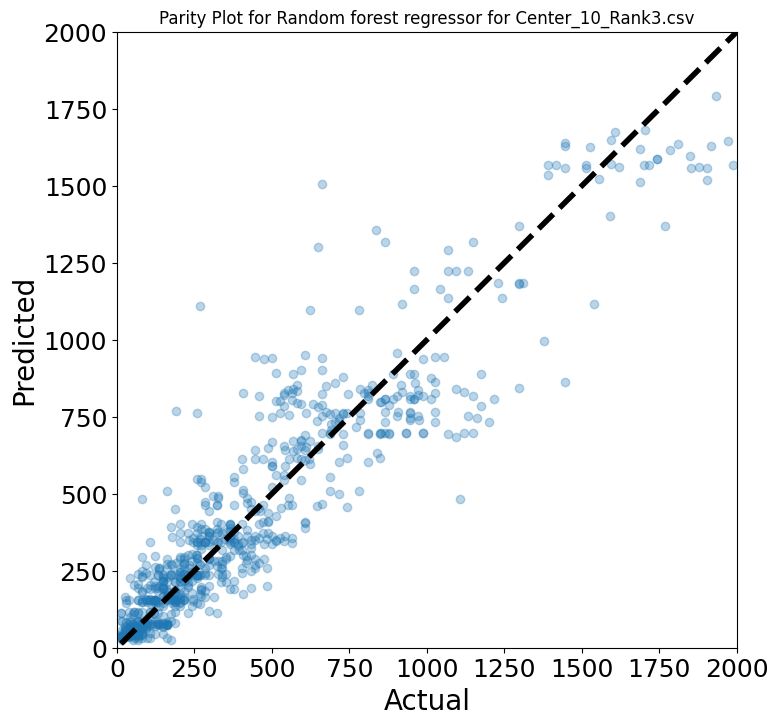



Center_11_Rank7.csv


Random forest regressor: RMSE = 207.09831620202394, MAE = 95.85959666203063, R-squared = 0.7907174015371683, Explained Variance = 0.7912658219986333, Max Error = 2674.72


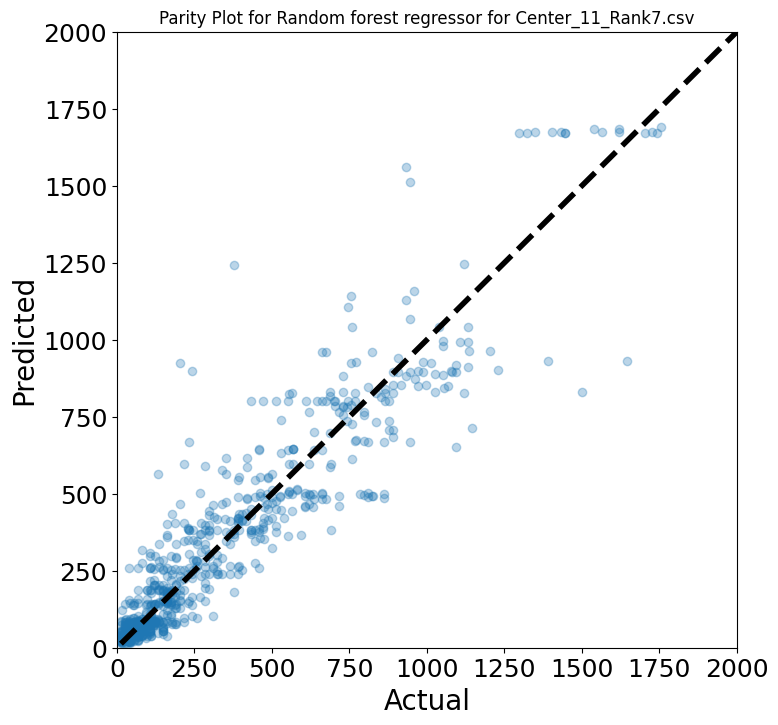



Center_137_Rank5.csv


Random forest regressor: RMSE = 133.46687020512547, MAE = 84.69102131076349, R-squared = 0.7190729991004395, Explained Variance = 0.7232368518153118, Max Error = 688.52


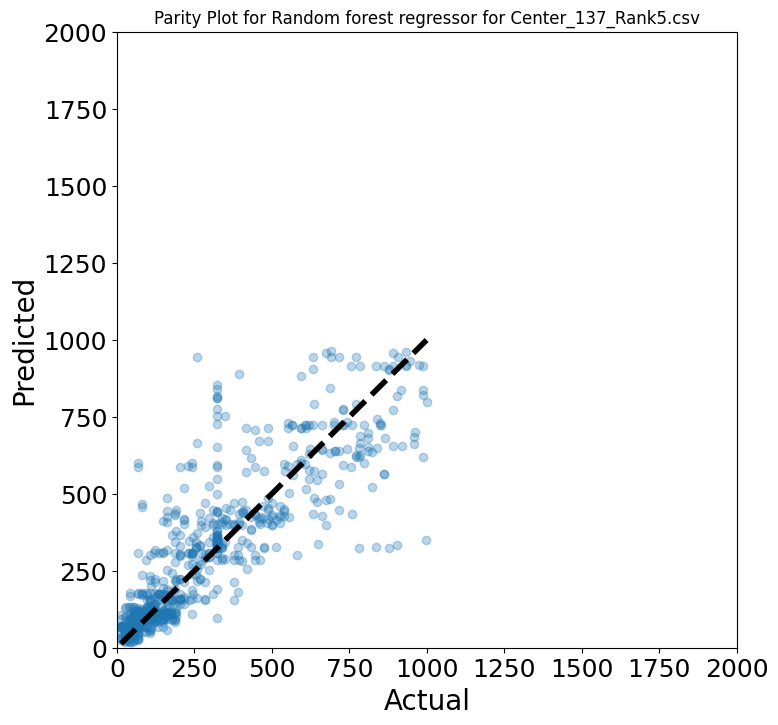



Center_13_Rank1.csv


Random forest regressor: RMSE = 358.98812799373326, MAE = 148.62865183246072, R-squared = 0.7959271557837097, Explained Variance = 0.79593526282748, Max Error = 6027.98


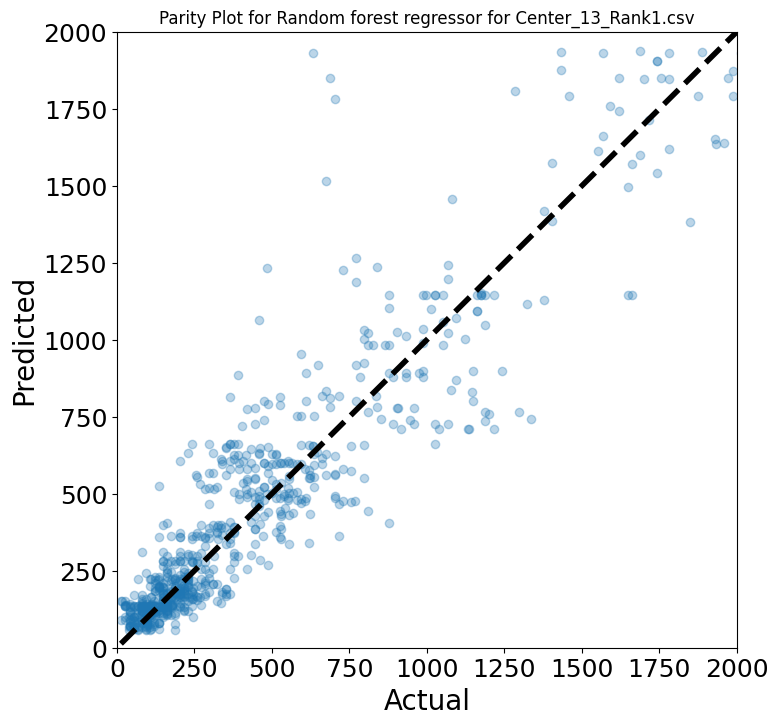



Center_174_Rank8.csv


Random forest regressor: RMSE = 160.22944672365446, MAE = 87.78507894736842, R-squared = 0.89140550813056, Explained Variance = 0.8930032403101196, Max Error = 1442.37


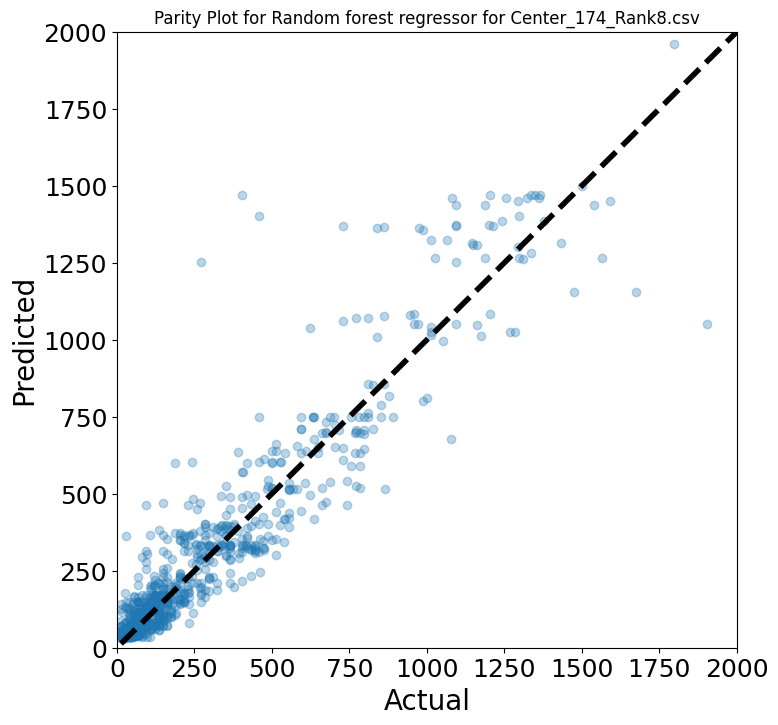



Center_27_Rank10.csv


Random forest regressor: RMSE = 133.8423687838382, MAE = 78.40441860465117, R-squared = 0.8906109793426296, Explained Variance = 0.8949384961428621, Max Error = 1030.96


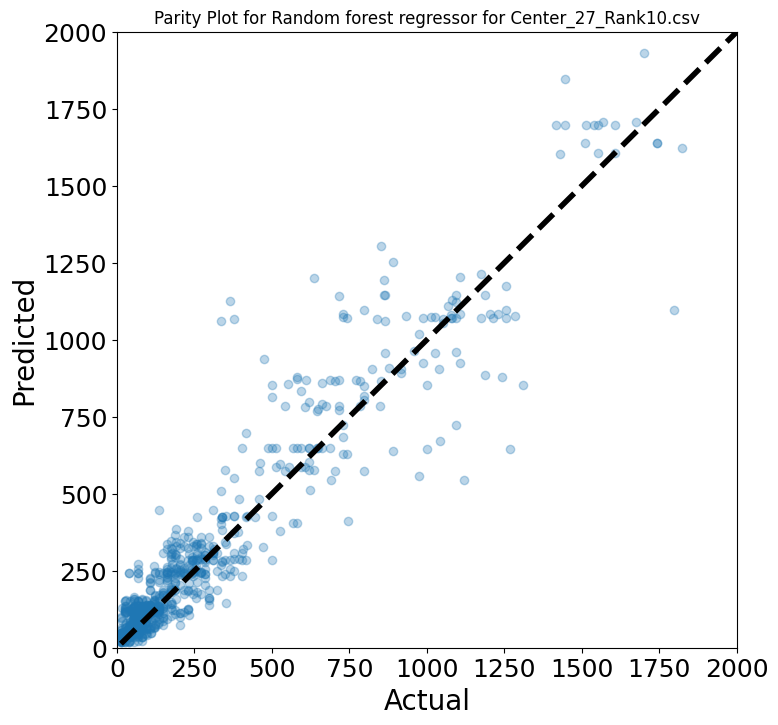



Center_43_Rank2.csv


Random forest regressor: RMSE = 399.8087645680529, MAE = 142.85844207723036, R-squared = 0.7518935670508595, Explained Variance = 0.7524294212150224, Max Error = 8715.939999999999


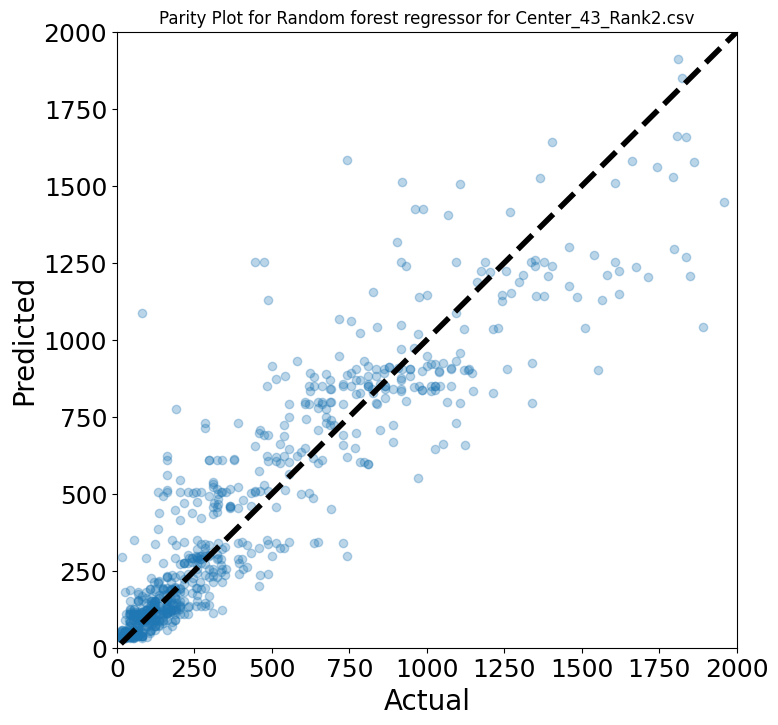



Center_52_Rank4.csv


Random forest regressor: RMSE = 157.7861729680208, MAE = 101.16203703703704, R-squared = 0.8980089210236915, Explained Variance = 0.8980247930826991, Max Error = 960.3399999999999


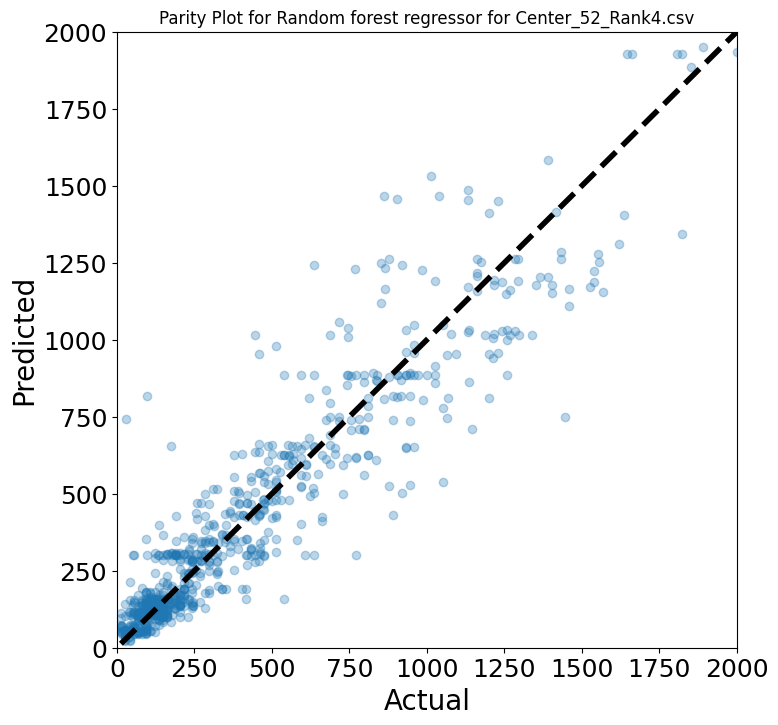



Center_67_Rank6.csv


Random forest regressor: RMSE = 306.27382207221007, MAE = 106.39257636122178, R-squared = 0.7501115544763464, Explained Variance = 0.7512809327949144, Max Error = 5584.92


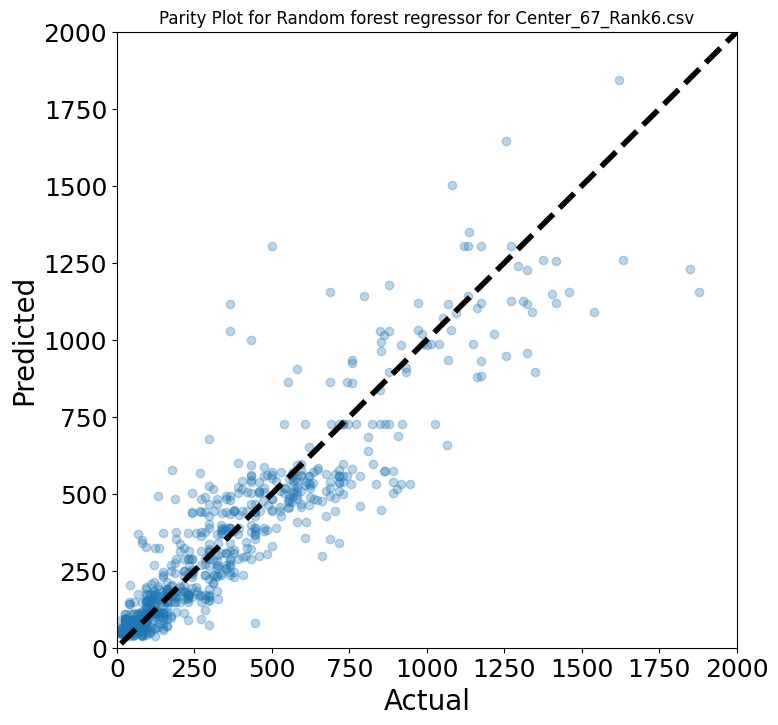

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, BayesianRidge, ARDRegression, \
    LassoLars, PassiveAggressiveRegressor, RANSACRegressor, TheilSenRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

csv_filenames = [
    'Center_104_Rank9.csv', 'Center_10_Rank3.csv', 'Center_11_Rank7.csv', 'Center_137_Rank5.csv',
    'Center_13_Rank1.csv', 'Center_174_Rank8.csv', 'Center_27_Rank10.csv', 'Center_43_Rank2.csv',
    'Center_52_Rank4.csv', 'Center_67_Rank6.csv']

for i in csv_filenames:
    data = pd.read_csv("{}".format(i))
    # Splitting data based on the 'week' column
    train_data = data[data['week'] <= 130]
    test_data = data[data['week'] > 130]

    # Selecting the features and target for training and testing
    X_train = train_data[["checkout_price","cuisine","meal_id","emailer_for_promotion","homepage_featured", "category", "week"]]
    y_train = train_data["num_orders"]
    X_test = test_data[["checkout_price","cuisine","meal_id","emailer_for_promotion","homepage_featured", "category", "week"]]
    y_test = test_data["num_orders"]

    # Defining the categorical columns to be one-hot encoded
    categorical_cols = ["cuisine","meal_id", "category"]

    # Creating a pipeline for transforming categorical variables
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ])

    # Creating a preprocessor for the pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_cols)
        ], remainder='passthrough')  # The 'remainder' parameter is set to 'passthrough' to include the 'week' feature

    # List of regressors to be evaluated
    regressors = [
      # ("Linear Regression", LinearRegression()),
      # ("Ridge Regression", Ridge(alpha=1.0)),
      # ("Lasso Regression", Lasso(alpha=1.0)),
      # ("ElasticNet Regression", ElasticNet(alpha=1.0, l1_ratio=0.5)),
      # ("Huber Regressor", HuberRegressor()),
      # ("Bayesian Ridge", BayesianRidge()),
      # ("ARD Regression", ARDRegression()),
      # ("Lasso Lars", LassoLars()),
      ("Random forest regressor", RandomForestRegressor(n_estimators=100, random_state=42)),
      # ("XGBRegressor", XGBRegressor()),
      # ("Theil-Sen Regressor", TheilSenRegressor())
  ]

    print(f"\n\n{i}\n\n")
    for name, model in regressors:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), (name, model)])

        # Fitting the model with the training data
        pipeline.fit(X_train, y_train)

        # Predicting with the testing data
        y_pred = pipeline.predict(X_test)

        # Calculating performance metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r_squared = r2_score(y_test, y_pred)
        explained_variance = explained_variance_score(y_test, y_pred)
        max_err = max_error(y_test, y_pred)

        # Printing the performance metrics
        print(f"{name}: RMSE = {rmse}, MAE = {mae}, R-squared = {r_squared}, Explained Variance = {explained_variance}, Max Error = {max_err}")

        # Parity Plot
        plt.figure(figsize=(8, 8))
        plt.scatter(y_test, y_pred, alpha=0.3)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
        plt.xlabel('Actual',fontsize=20)
        plt.ylabel('Predicted',fontsize=20)
        plt.title(f'Parity Plot for {name} for {i}')

        # Adjusting the scale of the x and y axes
        plt.xlim(0, 2000)  # Adjust the limits as needed
        plt.ylim(0, 2000)  # Adjust the limits as needed
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)

        plt.show()
